In [ ]:
!pip install face_recognition opencv-python-headless --quiet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
!pip uninstall -y dlib
!pip install dlib==19.24.0 --no-cache-dir --force-reinstall --no-binary :all: --no-use-pep517
!pip install face_recognition --no-cache-dir --force-reinstall --no-binary :all: --no-use-pep517
!pip install opencv-python-headless


Found existing installation: dlib 19.24.6
Uninstalling dlib-19.24.6:
  Successfully uninstalled dlib-19.24.6
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 37.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for dlib
  Running setup.py clean for dlib
Failed to build dlib
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (dlib)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 36.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 241.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 225.4 MB/s eta 0:00:00
ERROR: Disabling PEP 517

In [2]:

import cv2
import numpy as np
import os
from google.colab import files
from google.colab.patches import cv2_imshow



# STEP 3: Upload known face images
uploaded = files.upload()
os.makedirs("known_faces", exist_ok=True)

for filename in uploaded.keys():
    with open(os.path.join("known_faces", filename), 'wb') as f:
        f.write(uploaded[filename])
print("Uploaded known face images.")


In [3]:
# Step 3: Upload Labeled Face Images (e.g., user1_1.jpg, user1_2.jpg, user2_1.jpg)
uploaded = files.upload()
os.makedirs("faces", exist_ok=True)
for name in uploaded:
    with open(f"faces/{name}", "wb") as f:
        f.write(uploaded[name])
print("Uploaded training images.")



Saving download (2).jpeg to download (2).jpeg
Saving MV5BZTE0NTdhNGQtODY2MC00NGVjLTk2NjYtYjMwMmRjOTg2NzNhXkEyXkFqcGdeQXJoYW5uYWg@._V1_QL75_UX500_CR0,0,500,281_.jpg to MV5BZTE0NTdhNGQtODY2MC00NGVjLTk2NjYtYjMwMmRjOTg2NzNhXkEyXkFqcGdeQXJoYW5uYWg@._V1_QL75_UX500_CR0,0,500,281_.jpg
Uploaded training images.


In [6]:
import os
import cv2
import numpy as np

def get_images_and_labels(data_folder):
    faces = []
    labels = []
    label_dict = {}
    current_id = 0

    # Load the Haar cascade once
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    for filename in os.listdir(data_folder):
        if filename.lower().endswith((".jpg", ".png")):
            path = os.path.join(data_folder, filename)
            gray_image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

            # Detect faces in the image
            detected_faces = face_cascade.detectMultiScale(
                gray_image, scaleFactor=1.1, minNeighbors=5
            )

            # Extract label from filename (e.g., user1_1.jpg → user1)
            label_name = filename.split("_")[0]

            # Assign unique numeric ID to each label
            if label_name not in label_dict:
                label_dict[label_name] = current_id
                current_id += 1
            label_id = label_dict[label_name]

            # Extract and store faces with corresponding label IDs
            for (x, y, w, h) in detected_faces:
                face = gray_image[y:y+h, x:x+w]
                faces.append(face)
                labels.append(label_id)

    # Return faces, labels, and a reverse mapping of label IDs to names
    return faces, np.array(labels), {v: k for k, v in label_dict.items()}

# Example usage
faces, labels, id_to_name = get_images_and_labels("faces")
print("Training data prepared.")


Training data prepared.


In [7]:
recognizer = cv2.face.LBPHFaceRecognizer_create()
recognizer.train(faces, labels)
print("Model trained.")

Model trained.


In [8]:
# Step 6: Download and Load Deep Learning Face Detector
!wget -q https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/face_detector/deploy.prototxt
!wget -q https://github.com/opencv/opencv_3rdparty/raw/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel

# Load the DNN model
face_net = cv2.dnn.readNetFromCaffe(
    'deploy.prototxt',
    'res10_300x300_ssd_iter_140000.caffemodel'
)
print("DNN face detector loaded.")


DNN face detector loaded.


In [9]:
# Step 6: Upload a test image or video
test = files.upload()
test_path = list(test.keys())[0]


Saving SZA-R-B-singer-2022.webp to SZA-R-B-singer-2022.webp


In [11]:
from google.colab import files
files.upload()  # Select alarm.wav, prototxt, caffemodel


Saving breaking-news-177297.mp3 to breaking-news-177297.mp3


{'breaking-news-177297.mp3': b'\xff\xfb\xd4d\x00\x00\x06\xa7n\xd3\x05a\x80\x02P\x07\x89r\xa3 \x00!2\x13q\xf9\x9c\x80\n\r\x15l\xbb\x1f\x80\x00\xa5M3\t\xcdm5\x9c\x1c7X\xbd\x86C\x1dfqy\xac\xe0a\xa0\rA\xd8\x9b\xbf/YJL\xcd\xefu\x8b\x16,Xp`\xb1\xcf\x99\x9b\xb6vK\x12\xc0\xe0\x1c\x06\x82 \x90L0<X\xbc\xec\x96%\x93\xcf\xfc\xe0H\x06\xe0\xdcK?\xf6\x0e\x0c\t\x8287\x11\xc4\xb37\xd8$\t\x00L\x1b\x89bX\x96\r\xc1\xb87\'\x9e,X\xb3\xb6\xf7\xfd\xbd\xdb^f\xbf\xce\x04\xb1\x1cK\x12\xc4\xb1,K\x12\xcf\xcf\x16,X\xe5\'(\xbd{\xf8pH\x12\x0c"ag]y\xd9\xfb\xf433333^\xbd\xfa\x1f\xbe\xc1\x80\x90L<\xd30h"\x13\x0f\x16R\x8c,33_y\xa5(\xb0\xcc\xfe\xf8\xb1c\x9du\x87\x06\x06\x06\x0b\x1c\xa4\xcd(\xb1b\xc5\x94\xd6\x1c\xa5)JM\xd6,X\xb2\x86G\x00\x00\x00\x10\x08\r\xe4\xc9\xdd\xf8\x88\xcf\x11\x19d\xf4\x10\x00`\xbc\xa0P\x02\x80\xb0\xc9\x17\x06\x80\xd0Q?\x97\x142K>\xd1\x0c\x7f\xeb\xff\xfe]\xee\x1d\xef\xdd\xee\x1d\xff\xe7\x87{\xd1\x12\x9d\x12\xb7\x7fG\x7f\x84\xf7D\xe5\xde\xf4\x17>\xc4\x07!\x8f\xff\xe0\xf8\xe0|\xf8\x800P0B \x03Q4\xcf1(\

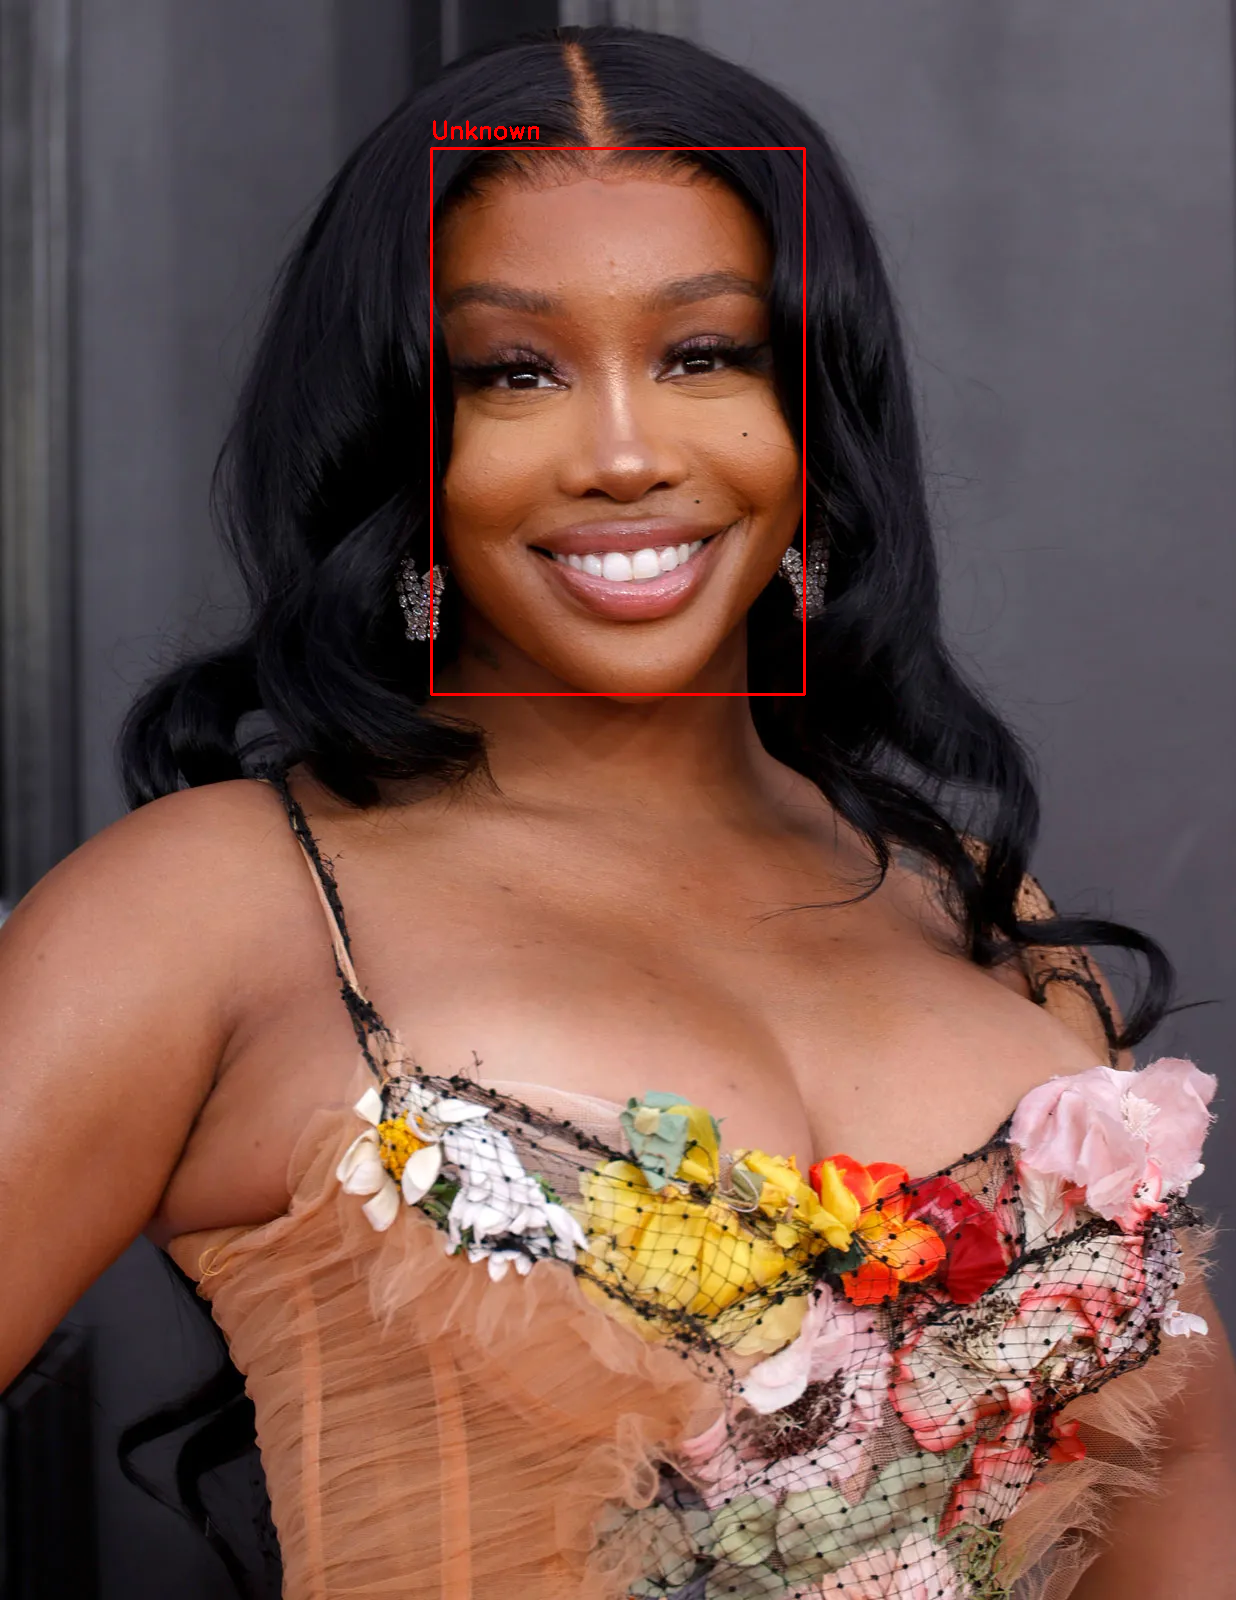

In [12]:
import cv2
import numpy as np
import time
import os
from IPython.display import Audio
from google.colab.patches import cv2_imshow

# Load OpenCV DNN face detector
face_net = cv2.dnn.readNetFromCaffe(
    'deploy.prototxt',
    'res10_300x300_ssd_iter_140000.caffemodel'
)

# Ensure output directory exists
os.makedirs("unauthorized", exist_ok=True)

# Check if input is image or video
is_video = test_path.endswith((".mp4", ".avi"))

if is_video:
    cap = cv2.VideoCapture(test_path)
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        h, w = frame.shape[:2]
        blob = cv2.dnn.blobFromImage(frame, 1.0, (300, 300), (104, 177, 123))
        face_net.setInput(blob)
        detections = face_net.forward()

        for i in range(detections.shape[2]):
            confidence = detections[0, 0, i, 2]
            if confidence > 0.7:  # Increased threshold for face detection
                box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
                (x1, y1, x2, y2) = box.astype("int")
                x1, y1 = max(0, x1), max(0, y1)

                face_roi = frame[y1:y2, x1:x2]
                gray_face = cv2.cvtColor(face_roi, cv2.COLOR_BGR2GRAY)
                try:
                    label, conf = recognizer.predict(gray_face)
                    name = id_to_name[label] if conf < 90 else "Unknown"  # Increased threshold for face recognition
                except:
                    name = "Unknown"

                color = (0, 255, 0) if name != "Unknown" else (0, 0, 255)
                cv2.rectangle(frame, (x1, y1), (x2, y2), color, 2)
                cv2.putText(frame, f"{name}", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2)

                if name == "Unknown":
                    # Save image & play alarm
                    cv2.imwrite(f"unauthorized/unknown_{int(time.time())}.jpg", frame[y1:y2, x1:x2])
                    display(Audio('alarm.wav', autoplay=True))

        cv2_imshow(frame)
    cap.release()
else:
    frame = cv2.imread(test_path)
    h, w = frame.shape[:2]
    blob = cv2.dnn.blobFromImage(frame, 1.0, (300, 300), (104, 177, 123))
    face_net.setInput(blob)
    detections = face_net.forward()

    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > 0.7:  # Increased threshold for face detection
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (x1, y1, x2, y2) = box.astype("int")
            x1, y1 = max(0, x1), max(0, y1)

            face_roi = frame[y1:y2, x1:x2]
            gray_face = cv2.cvtColor(face_roi, cv2.COLOR_BGR2GRAY)
            try:
                label, conf = recognizer.predict(gray_face)
                name = id_to_name[label] if conf < 90 else "Unknown"  # Increased threshold for face recognition
            except:
                name = "Unknown"

            color = (0, 255, 0) if name != "Unknown" else (0, 0, 255)
            cv2.rectangle(frame, (x1, y1), (x2, y2), color, 2)
            cv2.putText(frame, f"{name}", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2)

            if name == "Unknown":
                cv2.imwrite(f"unauthorized/unknown_{int(time.time())}.jpg", frame[y1:y2, x1:x2])
                display(Audio('breaking-news-177297.mp3', autoplay=True))

    cv2_imshow(frame)

